In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, timedelta
from fuzzywuzzy import process # First time using.

In [75]:
# Importing game data datasets

games_data = pd.read_csv("C:/Users/inten/Desktop/Data/Portfolio/Portfolio Data/Original Data/Transfermarket Football Data/games.csv")

games_events_data = pd.read_csv("C:/Users/inten/Desktop/Data/Portfolio/Portfolio Data/Original Data/Transfermarket Football Data/game_events.csv")

competition_data = pd.read_csv("C:/Users/inten/Desktop/Data/Portfolio/Portfolio Data/Original Data/Transfermarket Football Data/competitions.csv")

# Formatting date in the games_data file. Original date was in UK format.

games_data['date'] = pd.to_datetime(games_data['date'], dayfirst=True)

In [76]:
# Importing the fixture lists for the top 5 leagues in Europe

premier_league = pd.read_csv('Data/epl-2023-EasternStandardTime.csv')
la_liga = pd.read_csv('Data/la-liga-2023-EasternStandardTime.csv')
bundesliga = pd.read_csv('Data/bundesliga-2023-EasternStandardTime.csv')
serie_a = pd.read_csv('Data/serie-a-2023-EasternStandardTime.csv')
ligue_1 = pd.read_csv('Data/ligue-1-2023-EasternStandardTime.csv')

# Adding a column with the name of each corresponding league for future filters if needed.

premier_league['League'] = 'English Premier League'
la_liga['League'] = 'La Liga'
bundesliga['League'] = 'Bundesliga'
serie_a['League'] = 'Serie A'
ligue_1['League'] = 'Ligue 1'

# Concatenating all fixture lists into a single file & formatting the date.

fixtures = pd.concat([premier_league, la_liga, bundesliga, serie_a, ligue_1], ignore_index=True)

fixtures['Date'] = pd.to_datetime(fixtures['Date'], dayfirst=True)

fixtures

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result,League
0,1,1,2023-08-11 15:00:00,Turf Moor,Burnley,Man City,0 - 3,English Premier League
1,2,1,2023-08-12 08:00:00,Emirates Stadium,Arsenal,Nottingham Forest,2 - 1,English Premier League
2,3,1,2023-08-12 10:00:00,Vitality Stadium,Bournemouth,West Ham,1 - 1,English Premier League
3,4,1,2023-08-12 10:00:00,Amex Stadium,Brighton,Luton,4 - 1,English Premier League
4,5,1,2023-08-12 10:00:00,Goodison Park,Everton,Fulham,0 - 1,English Premier League
...,...,...,...,...,...,...,...,...
1747,302,34,2024-05-18 15:00:00,Parc Olympique Lyonnais,Olympique Lyonnais,RC Strasbourg Alsace,NaN,Ligue 1
1748,303,34,2024-05-18 15:00:00,Stade Saint-Symphorien,FC Metz,Paris Saint-Germain,NaN,Ligue 1
1749,304,34,2024-05-18 15:00:00,Stade Louis II,AS Monaco,FC Nantes,NaN,Ligue 1
1750,305,34,2024-05-18 15:00:00,Stade Auguste Delaune,Stade de Reims,Stade Rennais FC,NaN,Ligue 1


In [77]:
# Checking the first 10 rows for review.

games_data.head(10)

# games_events_data.head(10)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,Akhmat Grozny,Spartak Moscow,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,...,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,NaN,NaN,CSKA Moscow,Dynamo Moscow,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,...,RZD Arena,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,NaN,NaN,Lokomotiv Moscow,Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,...,Metallurg,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league
5,2222685,RU1,2012,19. Matchday,2012-12-10,2698,232,0,1,7.0,...,Central Stadium Kazan,8384.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/rubin-kazan_sp...,NaN,NaN,Rubin Kazan,Spartak Moscow,0:1,domestic_league
6,2222734,RU1,2012,19. Matchday,2012-12-07,1083,16704,2,3,11.0,...,Olimp-2,5700.0,Sergey Kuznetsov,https://www.transfermarkt.co.uk/fk-rostov_fk-k...,NaN,NaN,FK Rostov,FK Krasnodar,2:3,domestic_league
7,2222735,RU1,2012,18. Matchday,2012-12-02,2700,2410,2,0,1.0,...,Dinamo,15500.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/anzhi-makhachk...,NaN,NaN,Anzhi Makhachkala ( -2022),CSKA Moscow,2:0,domestic_league
8,2222739,RU1,2012,22. Matchday,2013-03-31,16704,2700,4,0,8.0,...,Kuban,18800.0,Aleksey Nikolaev,https://www.transfermarkt.co.uk/fk-krasnodar_a...,NaN,NaN,FK Krasnodar,Anzhi Makhachkala ( -2022),4:0,domestic_league
9,2222775,RU1,2012,28. Matchday,2013-05-12,3725,2700,1,0,8.0,...,Akhmat-Arena,22000.0,Vitali Meshkov,https://www.transfermarkt.co.uk/terek-grozny_a...,NaN,NaN,Akhmat Grozny,Anzhi Makhachkala ( -2022),1:0,domestic_league


In [78]:
# Inspecting the dataset to understand the data's structure and characteristics. 

games_data.describe()

games_events_data.describe()

games_data.info()

games_events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64702 entries, 0 to 64701
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 64702 non-null  int64         
 1   competition_id          64702 non-null  object        
 2   season                  64702 non-null  int64         
 3   round                   64702 non-null  object        
 4   date                    64702 non-null  datetime64[ns]
 5   home_club_id            64702 non-null  int64         
 6   away_club_id            64702 non-null  int64         
 7   home_club_goals         64702 non-null  int64         
 8   away_club_goals         64702 non-null  int64         
 9   home_club_position      45410 non-null  float64       
 10  away_club_position      45410 non-null  float64       
 11  home_club_manager_name  63966 non-null  object        
 12  away_club_manager_name  63966 non-null  object

In [79]:
# Merging competition & game_data for full competition name alongside ID

games_with_comp = pd.merge(games_data, competition_data[['competition_id', 'name']], on ='competition_id', how='left')

games_with_comp

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,name
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,Akhmat Grozny,Spartak Moscow,2:1,domestic_league,premier-liga
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league,premier-liga
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,...,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,NaN,NaN,CSKA Moscow,Dynamo Moscow,0:2,domestic_league,premier-liga
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,...,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,NaN,NaN,Lokomotiv Moscow,Rubin Kazan,1:0,domestic_league,premier-liga
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,...,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league,premier-liga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64697,2367292,EL,2013,Group B,2013-11-07,383,419,2,0,NaN,...,10000.0,Cristian Balaj,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,PSV Eindhoven,NaN,2:0,international_cup,europa-league
64698,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,NaN,...,31000.0,Allard Lindhout,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,PSV Eindhoven,NaN,6:0,domestic_cup,toto-knvb-beker
64699,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,...,34200.0,Anthony Taylor,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,PSV Eindhoven,NaN,3:0,international_cup,uefa-champions-league-qualifikation
64700,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,...,9410.0,Michael Salisbury,https://www.transfermarkt.co.uk/spielbericht/i...,4-2-3-1,4-2-3-1,Stoke City,NaN,6:1,other,efl-cup


In [80]:
# Unique list of competition IDs to ensure that data from the top 5 European leagues are in the dataset

unique_comp_ids = games_with_comp['name'].unique()

unique_comp_ids

array(['premier-liga', 'ligue-1', 'superligaen', 'jupiler-pro-league',
       'premier-league', 'scottish-premiership', 'bundesliga',
       'liga-portugal-bwin', 'laliga', 'super-lig', 'eredivisie',
       'super-league-1', 'serie-a', 'uefa-champions-league',
       'europa-league', 'copa-del-rey', 'toto-knvb-beker', 'allianz-cup',
       'sfa-cup', 'ukrainian-cup', 'italy-cup', 'fa-cup',
       'kypello-elladas', 'community-shield',
       'uefa-champions-league-qualifikation',
       'supertaca-candido-de-oliveira', 'dfb-pokal', 'russian-cup',
       'sydbank-pokalen', 'europa-league-qualifikation', 'supercopa',
       'fifa-klub-wm', 'efl-cup',
       'uefa-europa-conference-league-qualifikation', 'uefa-super-cup',
       'supercoppa-italiana', 'dfl-supercup', 'trophee-des-champions',
       'ukrainian-super-cup', 'russian-super-cup', 'johan-cruijff-schaal',
       'belgian-supercup'], dtype=object)

In [81]:
# List of competitions I am interested in

my_competitions = ['premier-league', 'bundesliga', 'laliga', 'serie-a', 'ligue-1']

In [82]:
# Filtering for events that are goals. 

goal_events = games_events_data[games_events_data['type'] == 'Goals']

# Grouping by game_id and counting the goals

goals_per_game = goal_events.groupby('game_id').size().reset_index(name='num_goals')

In [83]:
# Merging goal data and games data

games_with_goals = pd.merge(games_with_comp, goals_per_game, on='game_id', how='left')

In [84]:
# Filtering for games with more than 3 goals

high_scoring = games_with_goals[(games_with_goals['num_goals'] > 3) & (games_with_goals['name'].isin(my_competitions))].copy()

high_scoring

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,name,num_goals
34,2223921,FR1,2012,10. Matchday,2012-10-28,595,40,3,1,11.0,...,Sébastien Moreira,https://www.transfermarkt.co.uk/sc-bastia_fc-g...,NaN,NaN,SC Bastia,FC Girondins Bordeaux,3:1,domestic_league,ligue-1,4.0
36,2223924,FR1,2012,10. Matchday,2012-10-27,969,417,3,1,13.0,...,Benoît Bastien,https://www.transfermarkt.co.uk/montpellier-hs...,NaN,NaN,Montpellier HSC,OGC Nice,3:1,domestic_league,ligue-1,4.0
37,2223940,FR1,2012,13. Matchday,2012-11-17,14171,618,2,2,18.0,...,Wilfried Bien,https://www.transfermarkt.co.uk/fc-evian-thono...,NaN,NaN,Thonon Évian Grand Genève FC,AS Saint-Étienne,2:2,domestic_league,ligue-1,4.0
39,2223994,FR1,2012,19. Matchday,2012-12-22,595,1159,4,2,13.0,...,Stéphane Lannoy,https://www.transfermarkt.co.uk/sc-bastia_as-n...,NaN,NaN,SC Bastia,AS Nancy-Lorraine,4:2,domestic_league,ligue-1,6.0
40,2223996,FR1,2012,20. Matchday,2013-01-13,750,244,3,1,17.0,...,Fredy Fautrel,https://www.transfermarkt.co.uk/fc-sochaux-mon...,NaN,NaN,FC Sochaux-Montbéliard,Olympique Marseille,3:1,domestic_league,ligue-1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64503,3451089,ES1,2020,18. Matchday,2021-01-09,368,681,3,2,4.0,...,Javier Alberola Rojas,https://www.transfermarkt.co.uk/sevilla-fc_rea...,NaN,NaN,Sevilla FC,Real Sociedad,3:2,domestic_league,laliga,5.0
64511,2872227,GB1,2017,12. Matchday,2017-11-20,1237,512,2,2,9.0,...,Lee Mason,https://www.transfermarkt.co.uk/brighton-amp-h...,NaN,NaN,Brighton & Hove Albion,Stoke City,2:2,domestic_league,premier-league,4.0
64512,2872273,GB1,2017,16. Matchday,2017-12-09,148,512,5,1,6.0,...,Roger East,https://www.transfermarkt.co.uk/tottenham-hots...,NaN,NaN,Tottenham Hotspur,Stoke City,5:1,domestic_league,premier-league,6.0
64602,4113063,ES1,2023,9. Matchday,2023-10-07,368,367,2,2,14.0,...,Isidro Díaz de Mera Escuderos,https://www.transfermarkt.co.uk/sevilla-fc_ray...,4-2-3-1,4-2-3-1,Sevilla FC,Rayo Vallecano,2:2,domestic_league,laliga,4.0


In [85]:
# Sorting the team names within each row to ensure uniqueness

high_scoring['team_pair'] = high_scoring.apply(lambda x: '_'.join(sorted([x['home_club_name'], x['away_club_name']])), axis=1)

# Grouping & sorting by home and away team, summing the number of goals and counting the number of matchups

unique_team_combo_goals = high_scoring.groupby(['team_pair']).agg({'num_goals': 'sum', 'game_id': 'count'}).reset_index()

# Renaming game_id to num_matchups

unique_team_combo_goals.rename(columns={'game_id': 'num_matchups'}, inplace=True)

# Calculating average goals per game

unique_team_combo_goals['avg_goals_per_game'] = (unique_team_combo_goals['num_goals'] / unique_team_combo_goals['num_matchups']).round(2)

# Filtering for team combinations with a total goal count of at least 10

team_combo_goals_filter = unique_team_combo_goals[unique_team_combo_goals['num_goals'] >= 10]

# Sorting by the total number of goals

team_combo_goals_sorted = team_combo_goals_filter.sort_values(by='num_goals', ascending=False)

team_combo_goals_sorted.to_csv('team_combo_goals_sorted.csv', index=False)

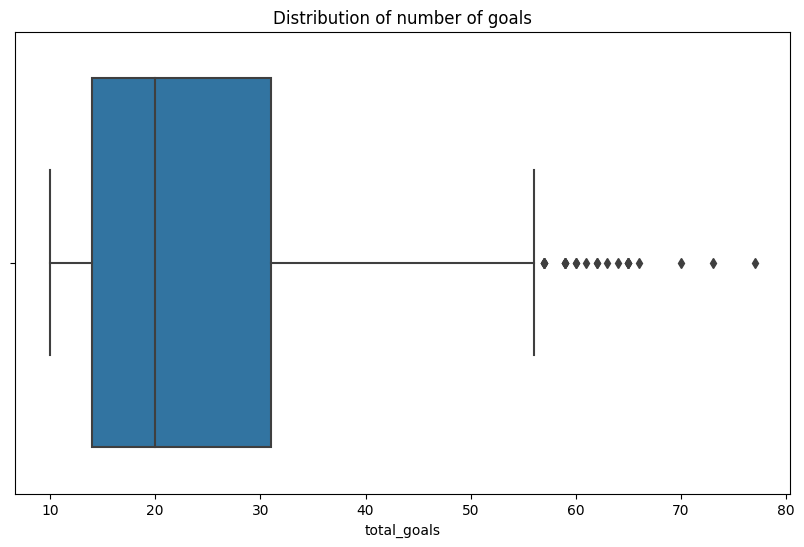

In [86]:
# Creating boxplot of the num_goals to understand the distribution of goals

plt.figure(figsize=(10,6))
sns.boxplot (x='num_goals', data=team_combo_goals_sorted)
plt.title('Distribution of number of goals')
plt.xlabel('total_goals')
plt.show()

## Boxplot Interpretation for Team Combination Goals

The boxplot above provides a visual summary of the distribution of total goals for unique team combinations across fixtures. This helps to understand if team pairing goal combinations are above, within or below the norm. The key observations are:

- Median: The median number of goals is positioned just over the 20-goal mark, indicating that half of the team combinations have a total goal count that is above this value and half below it.

- Interquartile Range (IQR): The IQR, depicted by the box, spans from approximately 15 to 30 goals. This range contains the middle 50% of the data and represents the spread of a typical total goal count for team combinations.

- Whiskers: The whiskers of the boxplot, which represent the range of the data excluding outliers, extend from around 10 goals to approximately 40 goals. This indicates that most team combinations fall within this range of total goals.

- Outliers: The plot shows several outliers as individual points beyond the upper whisker, indicating that there are some team combinations with total goals significantly higher than the rest, in some cases reaching 60 or more goals. These outliers suggest exceptionally high-scoring historical matches between teams such as FC Barcelona vs Real Betis Balompié and Arsenal vs Liverpool.

Overall, this boxplot suggests that while the majority of team combinations have a total goal count in the 10 to 40 range, there are notable exceptions that far exceed this range, which could be the focus for anyone interested in excessively high-scoring games.

In [87]:
# Identifying and comparing unique team names from the two different datasets.  
# The purpose is to ensure consistency in team names across both datasets, which is crucial for accurate data analysis and comparison. 
# Some team names such as Manchester United showed as Man Utd for example.

unique_teams_historical = set(games_data['home_club_name'].unique()).union(games_data['away_club_name'].unique())
unique_teams_fixtures = set(fixtures['Home Team'].unique()).union(fixtures['Away Team'].unique())

# Removing exact matches

non_duplicates = unique_teams_fixtures - unique_teams_historical

# Function to find best match. This is for teams like 'Tottenham Hotspurs' who may show up as just 'Spurs'.

def get_best_match(name, choices):
    match = process.extractOne(name, choices, score_cutoff=80)  # 80 is the similarity threshold
    return match[0] if match else name

# Resolving partial matches

resolved_names = {name: get_best_match(name, unique_teams_historical) for name in non_duplicates}

resolved_names

{'Lazio': 'SS Lazio',
 'Brighton': 'Brighton & Hove Albion',
 'Juventus': 'Juventus FC',
 'Fiorentina': 'ACF Fiorentina',
 '1. FC Union Berlin': '1.FC Union Berlin',
 'FC Bayern München': 'FC Pari Nizhniy Novgorod',
 'Milan': 'AC Milan',
 'Sport-Club Freiburg': 'SC Freiburg',
 '1. FC Heidenheim 1846': '1.FC Heidenheim 1846',
 'Havre AC': 'Le Havre AC',
 'Newcastle': 'Newcastle United',
 'Olympique Lyonnais': 'Olympique Lyon',
 'Luton': 'Luton Town',
 'Sassuolo': 'US Sassuolo',
 'RC Celta': 'RC Strasbourg Alsace',
 'Brentford': 'Brentford FC',
 'Arsenal': 'Arsenal FC',
 'Salernitana': 'US Salernitana 1919',
 'Chelsea': 'Chelsea FC',
 'Montpellier Hérault SC': 'SC Farense',
 'Fulham': 'Fulham FC',
 'TSG Hoffenheim': 'TSG 1899 Hoffenheim',
 'Spurs': 'Tottenham Hotspur',
 'Atalanta': 'Atalanta BC',
 'Cagliari': 'Cagliari Calcio',
 'Genoa': 'Genoa CFC',
 'Stade de Reims': 'Stade Reims',
 '1. FC Köln': '1.FC Köln',
 'Torino': 'Torino FC',
 'Everton': 'Everton FC',
 'Man City': 'Norwich City'

In [88]:
# Fixing a few incorrect matches in the list.

resolved_names['FC Bayern München'] = 'Bayern Munich'
resolved_names['RC Celta'] = 'Celta de Vigo'
resolved_names['Montpellier Hérault SC'] = 'Montpellier HSC'

# resolved_names

In [89]:
# Applying the resolved names to the fixtures data to ensure that it matches the games.csv team names.

for team in resolved_names:
    fixtures['Home Team'].replace(team, resolved_names[team], inplace=True)
    fixtures['Away Team'].replace(team, resolved_names[team], inplace=True)
    
fixtures

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result,League
0,1,1,2023-08-11 15:00:00,Turf Moor,Burnley FC,Norwich City,0 - 3,English Premier League
1,2,1,2023-08-12 08:00:00,Emirates Stadium,Arsenal FC,Nottingham Forest,2 - 1,English Premier League
2,3,1,2023-08-12 10:00:00,Vitality Stadium,AFC Bournemouth,West Ham United,1 - 1,English Premier League
3,4,1,2023-08-12 10:00:00,Amex Stadium,Brighton & Hove Albion,Luton Town,4 - 1,English Premier League
4,5,1,2023-08-12 10:00:00,Goodison Park,Everton FC,Fulham FC,0 - 1,English Premier League
...,...,...,...,...,...,...,...,...
1747,302,34,2024-05-18 15:00:00,Parc Olympique Lyonnais,Olympique Lyon,RC Strasbourg Alsace,NaN,Ligue 1
1748,303,34,2024-05-18 15:00:00,Stade Saint-Symphorien,FC Metz,Paris Saint-Germain,NaN,Ligue 1
1749,304,34,2024-05-18 15:00:00,Stade Louis II,AS Monaco,FC Nantes,NaN,Ligue 1
1750,305,34,2024-05-18 15:00:00,Stade Auguste Delaune,Stade Reims,Stade Rennais FC,NaN,Ligue 1


In [90]:
# Providing a cumulative total of historical goals and using a numeric zero to indicate the absence of data

def total_historical_goals(home_team, away_team, historical_data):
    # Creating the team pair identifier
    team_pair = '_'.join(sorted([home_team, away_team]))
    
    # Querying the historical data for this specific team pair
    historical = historical_data[historical_data['team_pair'] == team_pair]

    # Returning the total goals for this specific matchup
    return historical['num_goals'].sum() if not historical.empty else 0

In [91]:
# Applying the total_historical_goals function to the upcoming fixtures

fixtures['total_historical_goals'] = fixtures.apply(
    lambda row: total_historical_goals(row['Home Team'], row['Away Team'], team_combo_goals_sorted), axis=1
)

# Filtering for total historical goals that are greater than a set threshold (in my case, I chose 10)

fixtures_filtered = fixtures[fixtures['total_historical_goals'] > 10]

# Sorting the fixtures by total historical goals

upcoming_fixtures_14_days_sorted = fixtures_filtered.sort_values(by='total_historical_goals', ascending=False)

In [92]:
# Current date

today = datetime.today()

# Date 14 days from now to provide data on fixtures 2 weeks from now. 

fourteen_days_later = today + timedelta(days=14)

# Filter for fixtures in the next 14 days. Made a copy due to a copy error that I received.

upcoming_fixtures_14_days = fixtures[(fixtures['Date'] >= today) & (fixtures['Date'] <= fourteen_days_later)].copy()

# Checking the data types of the columns to ensure that Date is in the datetime format due to a string format issue I ran into previously. 
# This was ultimately fixed when I realized that the original file's date format was in UK time vs US time.

print(fixtures.dtypes)

# Ensuring 'Date' is in datetime format

fixtures['Date'] = pd.to_datetime(fixtures['Date'])

Match Number                       int64
Round Number                       int64
Date                      datetime64[ns]
Location                          object
Home Team                         object
Away Team                         object
Result                            object
League                            object
total_historical_goals           float64
dtype: object


In [93]:
# Applying the total_historical_goals function

upcoming_fixtures_14_days['total_historical_goals'] = upcoming_fixtures_14_days.apply(
    lambda row: total_historical_goals(row['Home Team'], row['Away Team'], team_combo_goals_sorted), axis=1
)

# Filtering fixtures with total historical goals greater than 10

upcoming_fixtures_14_days = upcoming_fixtures_14_days[upcoming_fixtures_14_days['total_historical_goals'] > 10]

# Sorting the fixtures by total historical goals and resetting the index

upcoming_fixtures_14_days_sorted = upcoming_fixtures_14_days.sort_values(by='total_historical_goals', ascending=False).reset_index(drop=True)

# Displaying the top 30 filtered and sorted fixtures for the games coming up within the next 2 weeks.

upcoming_fixtures_14_days_sorted[['Date', 'Home Team', 'Away Team', 'total_historical_goals']].head(30)

,Date,Home Team,Away Team,total_historical_goals
0,2023-12-02 09:30:00,Borussia Mönchengladbach,TSG 1899 Hoffenheim,65.0
1,2023-12-03 11:30:00,Bayer 04 Leverkusen,Borussia Dortmund,61.0
2,2023-12-09 09:30:00,Eintracht Frankfurt,Bayern Munich,49.0
3,2023-12-03 12:00:00,US Sassuolo,AS Roma,47.0
4,2023-12-03 09:00:00,West Ham United,Crystal Palace,46.0
5,2023-12-09 07:30:00,Crystal Palace,Liverpool FC,46.0
6,2023-12-03 09:00:00,AS Monaco,Montpellier HSC,44.0
7,2023-12-09 14:45:00,Inter Milan,Udinese Calcio,44.0
8,2023-12-07 15:15:00,Tottenham Hotspur,West Ham United,43.0
9,2023-12-09 09:30:00,SV Werder Bremen,FC Augsburg,42.0


#### What are the top 20 most entertaining team pair by number of goals scored?

In [97]:
# Sorting the DataFrame by 'num_goals' to find the best games by total goals scored historically.

best_games_by_goals = team_combo_goals_sorted.sort_values(by='num_goals', ascending=False)

# Using the head function to show the top 20 games and then resetting the index and adding + 1 to ensure the index starts at 1.

top_games_by_goals = best_games_by_goals.head(20)

top_games_by_goals_reset = top_games_by_goals.reset_index(drop=True)

top_games_by_goals_reset.index = top_games_by_goals_reset.index + 1

# Displaying the top 20 games by total goals scored historically.

top_games_by_goals_reset

top_games_by_goals_reset.to_csv('top_games_by_goals.csv', index=False)

#### What team appears most frequently in the pairing? Implying they are the most entertaining to watch (in terms of goals).

In [95]:
# Taking the top 50 games by total goals scored historically.

top_50_games_by_goals = team_combo_goals_sorted.nlargest(50, 'num_goals')

# Splitting the 'team_pair' string into two separate team names

team_pairs = top_50_games_by_goals['team_pair'].str.split('_', expand=True)

# Concatenating the two columns into one Series

teams_flat_list = pd.concat([team_pairs[0], team_pairs[1]]).reset_index(drop=True)

# Finding the team that appears most frequently in the top 50 games

most_frequent_team = teams_flat_list.value_counts().idxmax()

most_frequent_team

'Borussia Dortmund'

#### What are the top 10 most frequent teams in the top 100 and how frequently are they in the top 100?

In [98]:
# Getting the top 100 games by total goals scored historically.

top_100_games_by_goals = team_combo_goals_sorted.nlargest(100, 'num_goals')

# Splitting the 'team_pair' column into individual teams.
teams_split = top_100_games_by_goals['team_pair'].str.split('_', expand=True)

# Flattening the DataFrame and getting a series of all teams.

all_teams = pd.concat([teams_split[0], teams_split[1]], axis=0)

# Getting the top 10 most frequent teams.

top_10_teams = all_teams.value_counts().head(10)

# Convert the Series to a DataFrame for a table format for easier viewing and adding 1 to the index.

top_10_teams_df = top_10_teams.reset_index()

top_10_teams_df.index = top_10_teams_df.index + 1

top_10_teams_df.columns = ['Team', 'Frequency']

# Displaying the DataFrame as a table

top_10_teams_df

top_10_teams_df.to_csv('top_10_freq_teams.csv', index=False)

After completing this project, I understand that there are limitations of assessing entertainment value in football (soccer) games using historical goal data. I've listed a few below.

1. **Historical Data May Not Reflect Current Team Form**

    **Context:** Historical goal data is a retrospective look at past performances, which may not accurately represent the current form and capabilities of a team. Some teams in Europe such as Ajax are severely underperforming as an example.
    
    **Impact:** Teams undergo changes in players, management, and strategies, which can significantly alter their performance compared to historical data.

2. **Over-reliance on Goal Count**

    **Context:** Defining entertainment value purely on the number of goals scored may overlook other aspects of the game that contribute to its excitement such as possession stats, goals to card shown ratio or dribbles completed.

    **Impact:** Games with fewer goals but high-quality gameplay, tactical battles, or dramatic moments may be undervalued.

3. **Variability in Competition Levels**

    **Context:** The level of competition in the different leagues can vary, affecting the pace and style of play.
    
    **Impact:** A direct comparison across different competitions without accounting for these variables might lead to skewed interpretations.

4. **Absence of Contextual Factors**

    **Context:** Factors such as player injuries, weather conditions, and home-field advantage play a significant role in the game's outcome.
    
    **Impact:** Without considering these factors, the analysis might miss critical elements that affect a game's entertainment value.

5. **Subjectivity of Entertainment**

    **Context:** Entertainment value is very subjective and can vary greatly among different audiences. I chose to simplify this in this case by just looking at goals but this can be applied to many factors in a game.

    **Impact:** What is considered entertaining to one group of fans (e.g., high-scoring games) may not be as appealing to others who might prefer strategic or defensive play.